# Real Pricing

### BOSTON HOUSING DATASET

Attribute Information (in order) of the Boston dataset:
    - CRIM         per capita crime rate by town
    - ZN           proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS        proportion of non-retail business acres per town
    - CHAS         Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    - NOX          nitric oxides concentration (parts per 10 million)
    - RM           average number of rooms per dwelling
    - AGE          proportion of owner-occupied units built prior to 1940
    - DIS          weighted distances to five Boston employment centres
    - RAD          index of accessibility to radial highways
    - TAX          full-value property-tax rate per $10,000
    - PTRATIO      pupil-teacher ratio by town
    - B            1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT        % lower status of the population
    - MEDV         Median value of owner-occupied homes in $1000's

The Task

The task is to predict the house price (MEDV) of the Boston dataset.
The goal is to be able to make a price prediction of a house and to determine the factors on which the price depends.

The Result:

Dependencies in this case: 
* 'INDUS', 
* 'NOX', 
* 'RM', 
* 'TAX', 
* 'PTRATIO', 
* 'LSTAT', 
(The description of that is below) 

Here are 5 Samples:

* PREDICTION:  18.19  // REAL:  15.4  // DIFFERENCE:  2.79

* PREDICTION:  13.36  // REAL:  13.3  // DIFFERENCE:  0.06

* PREDICTION:  28.2  // REAL:  28.2  // DIFFERENCE:  0.0

* PREDICTION:  17.51  // REAL:  17.5  // DIFFERENCE:  0.01

* PREDICTION:  30.3  // REAL:  27.1  // DIFFERENCE:  3.2

## 1. Load libraries and dataset

In [1]:
#load libraries
import pandas as pd
import numpy as np

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#Loading the dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Printing out the description of the dataset and its columns
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#features of the dataset
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#reading dataset in a pandas dataframe
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
#Overview of dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The price column is the houses is set as 'MEDV' and it must be added to the dataframe

In [7]:
#adding the price column
df['MEDV'] = boston.target

#crossing checking dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Quality check

This is to have a quick overview of the geberal information of the dataset and test to see the general statitical overview of the rows and columns of the dataset using the .describe() function.

In [8]:
#info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### SUMMARY (Quality check)

There are 506 rows of data with no null values and a total of 14 columns together with the target column, MEDV(price).

The maximum price of the house is 50 with the minimun at 5 from the .describe() summary. 

The mean price of the houses is at 22.5 and a standard deviation of 9.19 dollars

## 3. EDA

In order to understand the dataset and its relationship with the dependant variable, the dataset must be visualised.

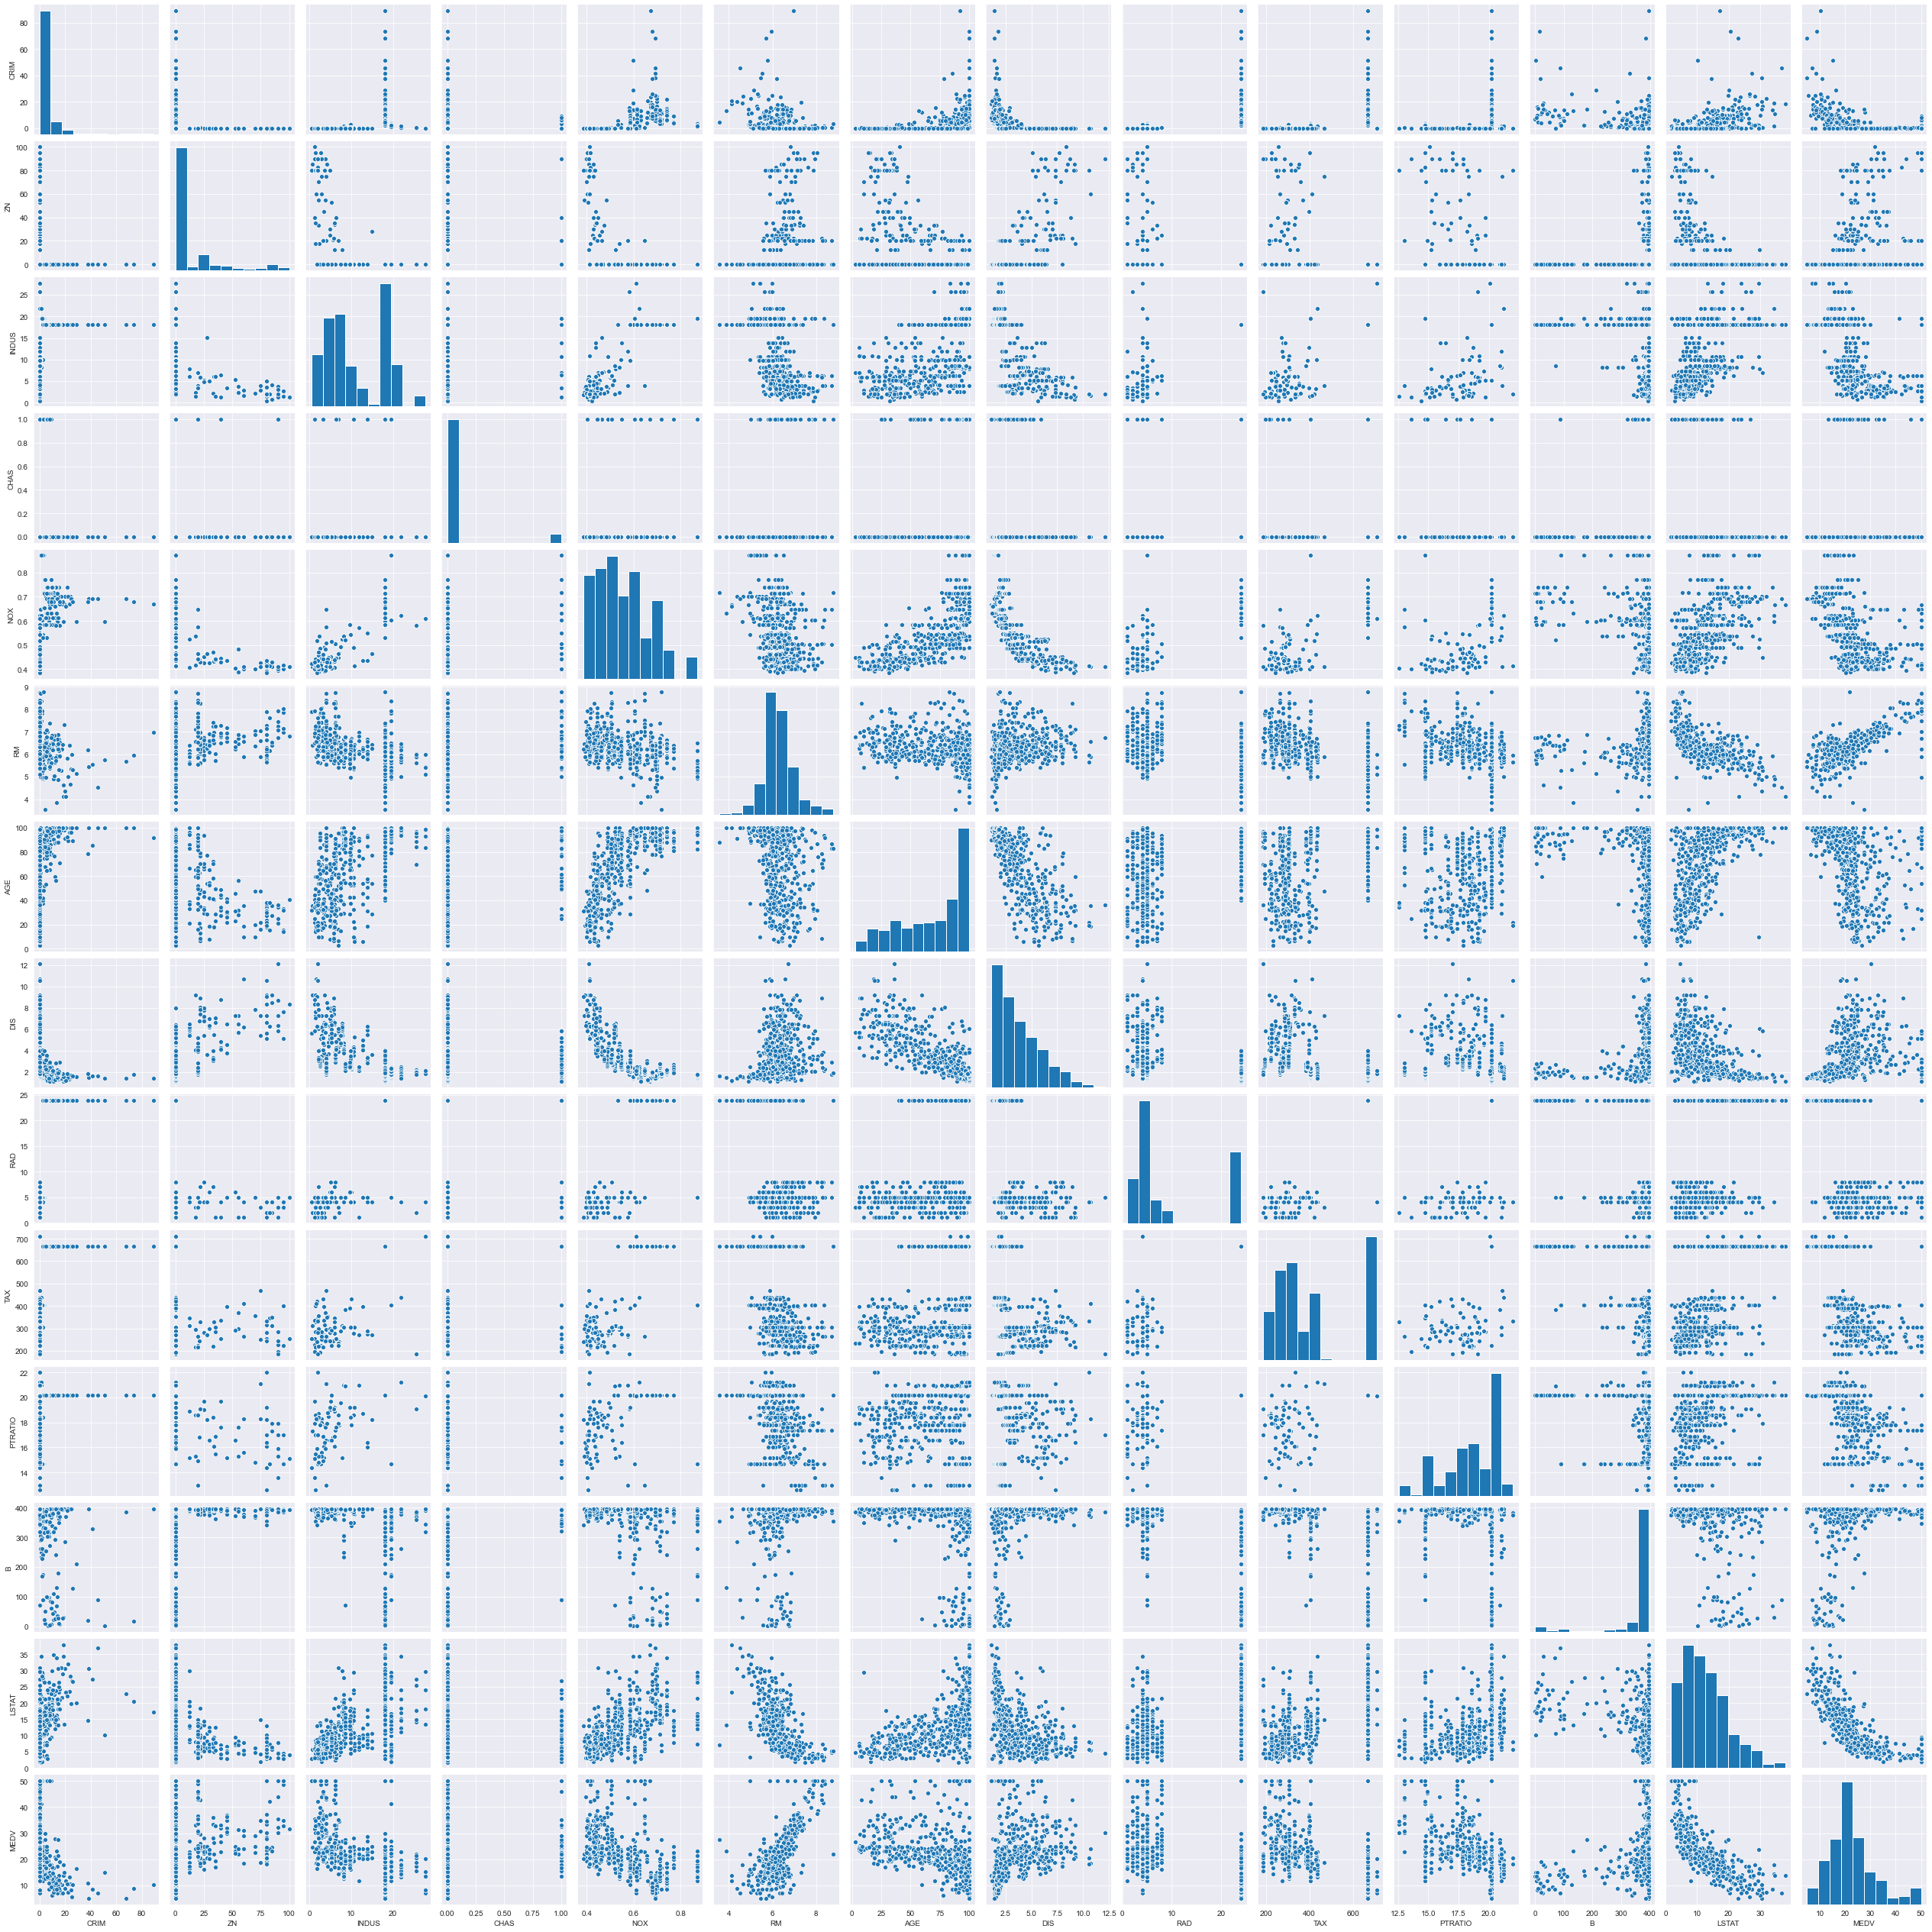

In [10]:
#General overview of dataset
sns.pairplot(df)

SUMMARY

There seems to be a linear relationship (negeative) between MEDV(price) and the RM feature.

Secondly, there seems to be a positive linear relationship between MEDV(price) and LSTAT feature.

/Users/kennethdadzie/opt/anaconda3/envs/TouchBase/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


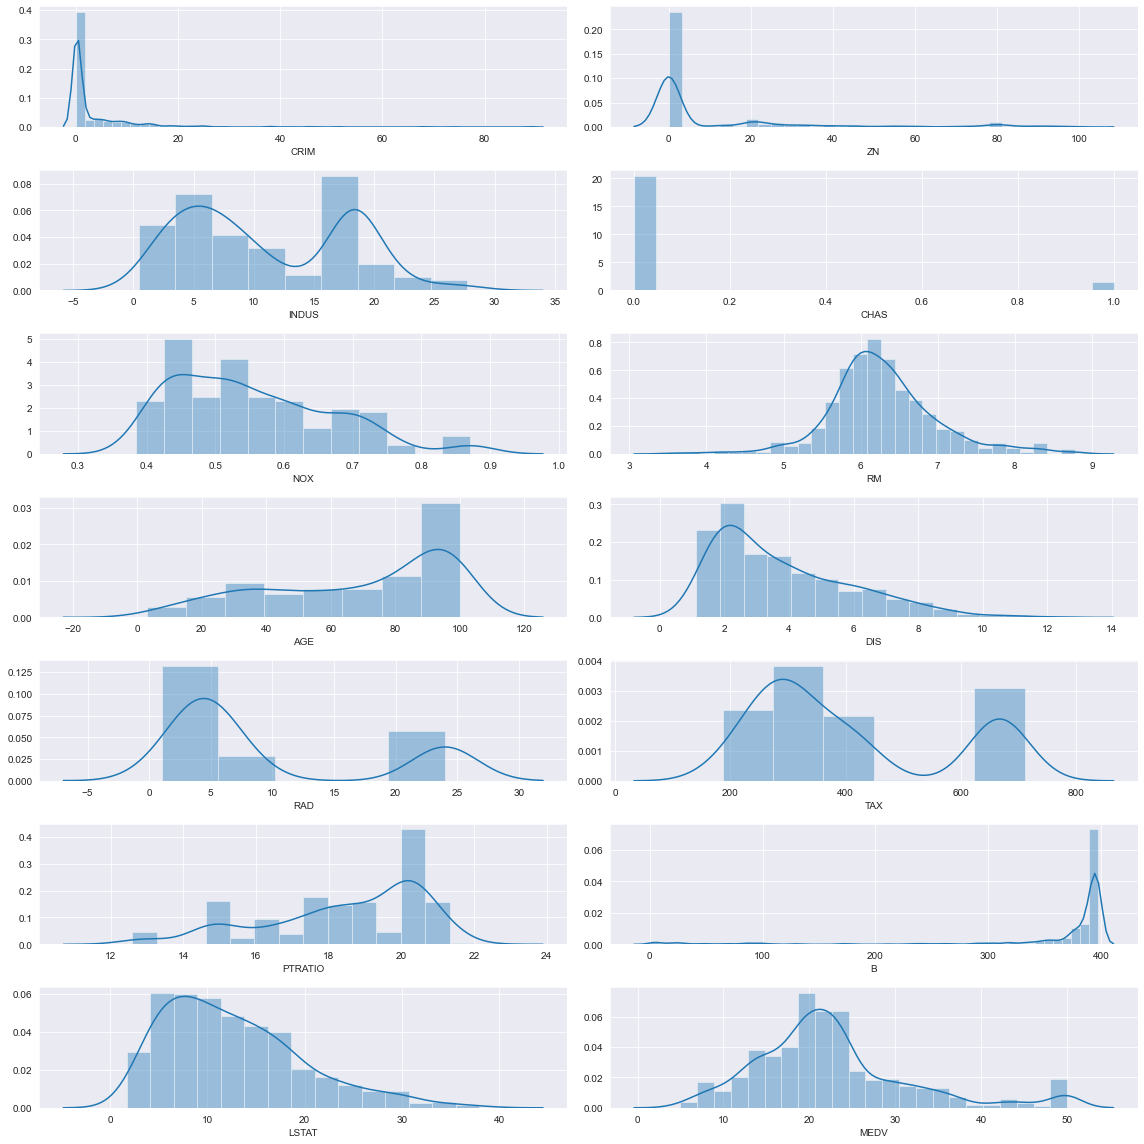

In [11]:
rows = 7
cols = 2

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,16))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
        plt.tight_layout()

### Pearson Correlation

The correlation coefficient gives us an idea of possible relationships within the data. 

The Pearson correlation coefficient, r, can take a range of values from +1 to -1. 

* A value of 0 indicates that there is no association between the two variables. 
* A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. 
* A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases

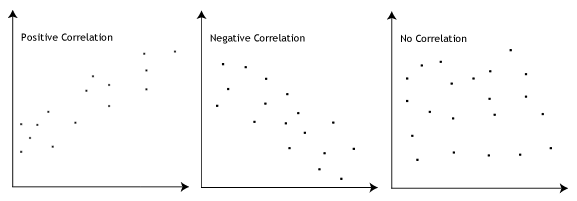

Some general interpretations of the absolute value of the correlation coefficent are:

.00 -.19 “very weak”

.20 -.39 “weak”

.40 -.59 “moderate”

.60 -.79 “strong”

.80 -1.0 “very strong”

To visualize this correlation, seaborn correlation heatmap would be plotted to understanding the correlation of features with the target column MEDV(price)

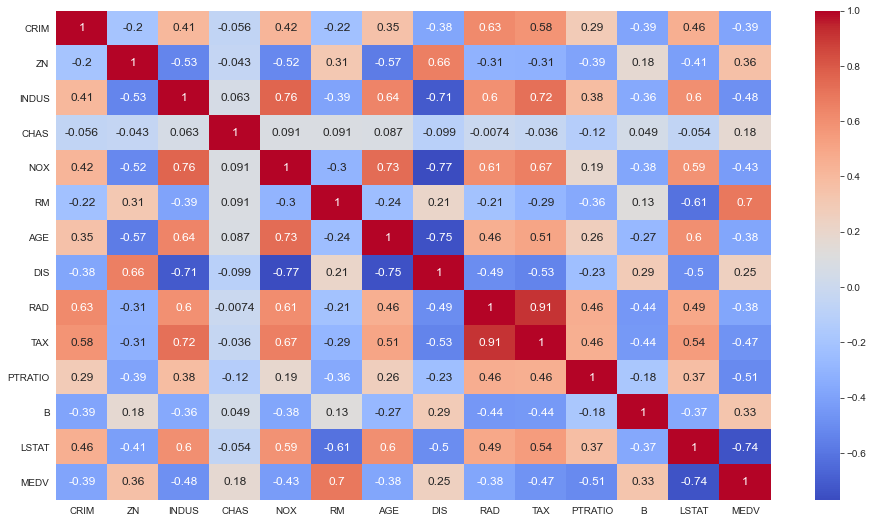

In [52]:
fig, ax = plt.subplots(figsize = (16, 9)) 
sns.heatmap(df.corr(), annot = True,cmap='coolwarm',annot_kws={'size': 12});

Our focus is on the MEDV(price) so we focus on correlated features for that column

In [13]:
def getCorrelatedFeature(corrdata, threshold):
    feature = [] 
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index) 
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value']) 
    return df

In [14]:
threshold = 0.4 
corr_value = getCorrelatedFeature(df.corr()['MEDV'], threshold)
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

The following features below are relevant features necessary for price prediction for the Boston Housing dataset.

In [15]:
correlated_data = df[corr_value.index] 
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


### 4. Model (Linear regression)

The train dataset would be split into two. One for training and the other for testing the model to see how well it will perform against the true lables. 

This enables the data scientist to see the actual performance of the model on data it hasnt seen before(test data). When satisfied with the performance, the model can then be deployed for use on the actual test dataset provided for predictions.

In [16]:
#importing train_test split
from sklearn.model_selection import train_test_split

In [30]:
X = correlated_data.drop(labels=['MEDV'], axis = 1) 
y = correlated_data['MEDV']

#splitting the data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [31]:
#importing linear regression model
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

In [32]:
#fit linear model
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
predictions = lm.predict(X_test)

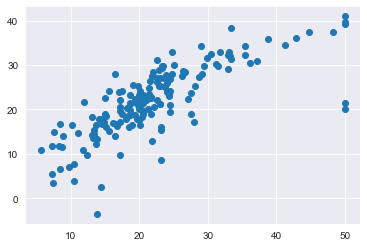

In [50]:
plt.scatter(y_test,predictions);

**Residual Histogram**

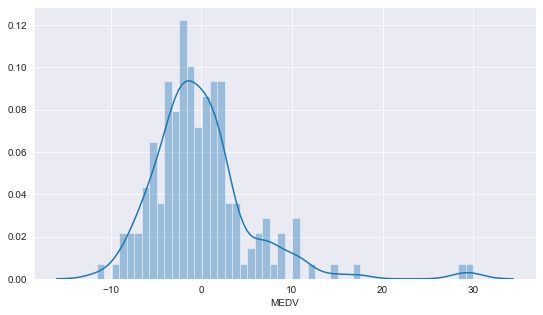

In [49]:
plt.figure(figsize=(9,5))
sns.distplot((y_test-predictions),bins=50);

### 5. Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [36]:
# print the intercept
print(lm.intercept_)

23.515586639381876


In [37]:
lm.coef_

array([ 7.22732166e-02, -3.89096326e+00,  4.56177070e+00, -3.31090052e-03,
       -1.09280427e+00, -5.35583251e-01])

In [38]:
#convert to dataframe to know what the arrays above represent
coeff_df = round(pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']),3)
coeff_df

,Coefficient
INDUS,0.072
NOX,-3.891
RM,4.562
TAX,-0.003
PTRATIO,-1.093
LSTAT,-0.536


**Regression Coefficients**

In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. 

A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant and vice versa for a positive coefficient.

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **INDUS** is associated with an **increase of $0.072 ** .


- Holding all other features fixed, a 1 unit increase in **NOX** is associated with an **decrease of $-3.891 **.


- Holding all other features fixed, a 1 unit increase in **RM** is associated with an **increase of $4.562 **.


- Holding all other features fixed, a 1 unit increase in **TAX** is associated with an **decrease of $-0.003 **.


- Holding all other features fixed, a 1 unit increase in **PTRATIO** is associated with an **decrease of $-1.093 **.


- Holding all other features fixed, a 1 unit increase in **LSTAT** is associated with an **decrease of $-0.536 **.

In [39]:
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients) + y_axis

In [45]:
from random import randint 
for i in range(5):
    index = randint(0,len(df)-1)
    sample = df.iloc[index][corr_value.index.values].drop('MEDV')
    print('PREDICTION: ', round(lin_func(sample),2),
          ' // REAL: ',df.iloc[index]['MEDV'], ' // DIFFERENCE: ', round(round(lin_func(sample),2) - df.iloc[index]['MEDV'],2))

PREDICTION:  18.19  // REAL:  15.4  // DIFFERENCE:  2.79
PREDICTION:  13.36  // REAL:  13.3  // DIFFERENCE:  0.06
PREDICTION:  28.2  // REAL:  28.2  // DIFFERENCE:  0.0
PREDICTION:  17.51  // REAL:  17.5  // DIFFERENCE:  0.01
PREDICTION:  30.3  // REAL:  27.1  // DIFFERENCE:  3.2


## Regression Evaluation Metrics


Three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** 
- **MSE** 
- **RMSE** is more popular because RMSE is interpretable in the "y" units.

All of these are **loss functions**, which we seek to minimize.

In [41]:
#RMSE error
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 5.699720053022682


In [42]:
#avearge mean of prices
np.mean(df['MEDV'])

22.532806324110677

SUMMARY

On aveage,  we are at a loss of 5.69 which when compared to the average mean prices of the dataset, our model is doing pretty well.